In [1]:
from sklearn.metrics import accuracy_score, roc_auc_score, confusion_matrix, roc_curve, RocCurveDisplay, PrecisionRecallDisplay
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt

## Classification

Imagine we have labels collected in `y`, and the output (probabilities) of two classifiers in `y_hat1` and `y_hat2`.

In [7]:
d = loadmat("ex_metrics_class.mat")
y = d["y"].flatten()
y_hat1 = d["yhat"].flatten()
y_hat2 = d["yhat2"].flatten()
print(y)
print(y_hat1)
print(y_hat2)


[1 0 0 0 0 1 1 0 1 0]
[0.9  0.55 0.62 0.01 0.75 0.78 0.45 0.42 1.   0.48]
[0.9  0.75 0.62 0.68 0.75 0.8  0.78 0.75 1.   0.77]


How can we quantify the difference between the two classifiers?

One way is to use accuracy, i.e., we can set a threshold and check how many predictions are correct.
However, this is not a good idea, because the threshold is arbitrary and we can get different results depending on the threshold we choose.

In [8]:
threshold = 0.5
y_hat1_binary = (y_hat1 >= threshold).astype(int)
y_hat2_binary = (y_hat2 >= threshold).astype(int)

def my_accuracy(y, y_hat, threshold=0.5):
    return np.sum(y == (y_hat>=threshold)) / len(y)

print(f"Accuracy: 1: {my_accuracy(y, y_hat1, threshold):.2f}, 2: {my_accuracy(y, y_hat2, threshold):.2f}")


Accuracy: 1: 0.60, 2: 0.40


Note that choosing another threshold will affect the results of both classifiers.

In [9]:
threshold = 0.8
print(f"Accuracy: 1: {my_accuracy(y, y_hat1, threshold):.2f}, 2: {my_accuracy(y, y_hat2, threshold):.2f}")

Accuracy: 1: 0.80, 2: 0.90


The area under the ROC curve (AUC) is a better metric to compare classifiers. It is defined as the probability that a randomly chosen positive instance is ranked higher than a randomly chosen negative instance.
The ROC curve is a plot of the true positive rate (TPR) against the false positive rate (FPR) at various threshold settings. The AUC is the area under this curve, which provides a single scalar value to compare classifiers.

A simple way to plot the ROC curve is to use the `RocCurveDisplay` class from `sklearn` (see documentation for details on how to use it).

## 🔍 Precision, Recall und ROC – Grundlagen für Klassifikationsmodelle
 
### 📊 1. Confusion Matrix

Bei binärer Klassifikation ergibt sich aus den Vorhersagen folgende Matrix:
 
|                  | Predicted Positive | Predicted Negative |

|------------------|--------------------|--------------------|

| **Actual Positive** | True Positive (TP)     | False Negative (FN)    |

| **Actual Negative** | False Positive (FP)    | True Negative (TN)     |
 
---
 
### 🎯 2. Precision (Genauigkeit der Positiven Vorhersagen)
 
> **Precision = TP / (TP + FP)**
 
- Misst, **wie viele der als positiv vorhergesagten Fälle wirklich positiv sind**.

- Hoch bei wenigen **False Positives**.

- Wichtig bei **hohen Kosten für falschen Alarm** (z. B. Spam-Filter, medizinische Tests).
 
---
 
### 🧠 3. Recall (Sensitivität / Trefferquote)
 
> **Recall = TP / (TP + FN)**
 
- Misst, **wie viele der tatsächlich positiven Fälle korrekt erkannt wurden**.

- Hoch bei wenigen **False Negatives**.

- Wichtig, wenn es **teuer ist, etwas zu übersehen** (z. B. Krebsdiagnose, Sicherheitsrisiken).
 
---
 
### ⚖️ 4. Precision vs. Recall – der Tradeoff
 
- Erhöht man den Schwellenwert (`threshold`) für die Klassifikation, kann Precision steigen, aber Recall sinken – und umgekehrt.

- Die **F1-Score** ist das harmonische Mittel von Precision und Recall:
 
> **F1 = 2 * (Precision * Recall) / (Precision + Recall)**
 
---
 
### 📈 5. ROC-Kurve (Receiver Operating Characteristic)
 
- Zeigt den Zusammenhang zwischen **True Positive Rate (TPR = Recall)** und **False Positive Rate (FPR)** bei verschiedenen Schwellenwerten.
 
> **TPR = Recall = TP / (TP + FN)**  
> **FPR = FP / (FP + TN)**
 
- Eine perfekte Klassifikation erreicht oben links die Koordinate (FPR=0, TPR=1).

- Die **AUC (Area Under Curve)** misst die Fläche unter der ROC-Kurve:

  - **AUC = 1.0** → perfektes Modell

  - **AUC = 0.5** → Zufall
 
---
 



## Bewertung von Klassifikationsmodellen – AUC vs. Loss

### ✅ AUC (Area Under the ROC Curve)
- Bewertet die Trennschärfe des Modells zwischen Klassen
- Unabhängig von Schwellenwerten (z. B. 0.5)
- Robust bei unausgeglichenen Klassen
- Wertebereich: 0.5 (zufällig) bis 1.0 (perfekt)
- Eignet sich gut zum Modellvergleich in der Klassifikation

### ❌ Loss-Funktion (z. B. log loss, cross-entropy)
- Wird zum Training optimiert, nicht zur externen Bewertung
- Abhängig von der Skala der Vorhersagen
- Schwierig interpretierbar
- Nicht direkt vergleichbar zwischen verschiedenen Modelltypen
- Nützlich zur Diagnose im Training, aber nicht primär zur Leistungsbewertung

### 📌 Empfehlung
- Für **Modellvergleich**: AUC (oder auch Accuracy, F1, Precision/Recall)
- Für **Modelltraining**: Loss-Funktion minimieren

## 🎯 Was ist der AUC-Wert?
AUC = Area Under the Curve
→ Maß für die Gesamtleistung eines Klassifikators

Wertebereich:

1.0: perfekter Klassifikator

0.5: reines Raten (Random Guess)

< 0.5: schlechter als Zufall (z. B. invertierte Vorhersagen)

## Wie kommt man auf die Kurve?

Berechne für verschiedene decision boundaries die TPR, FPR -> Wir bekommen Punkte 
Für Boundary gleich 1, werden nur solche Werte als True predicted, welche tatsächlich dem Modell nach mit Wahrscheinlichkeit 1 positiv sind => Hier ist also die FPR = 0.


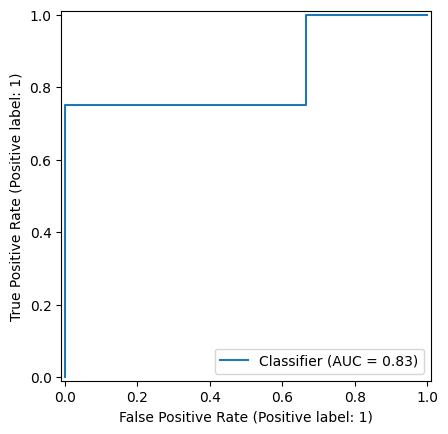

In [10]:
RocCurveDisplay.from_predictions(y, y_hat1)

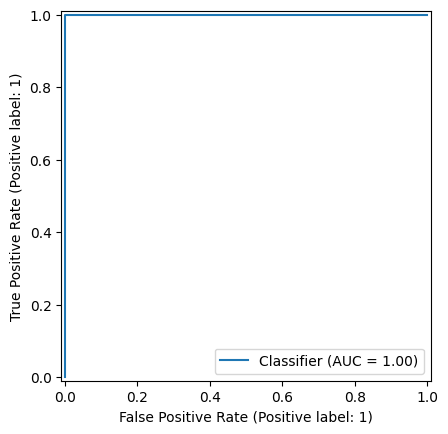

In [11]:
RocCurveDisplay.from_predictions(y, y_hat2)

In [12]:
print(f"The first classifier has an AUC of {roc_auc_score(y, y_hat1):.2f}, while the second classifier has an AUC of {roc_auc_score(y, y_hat2):.2f}.")

The first classifier has an AUC of 0.83, while the second classifier has an AUC of 1.00.


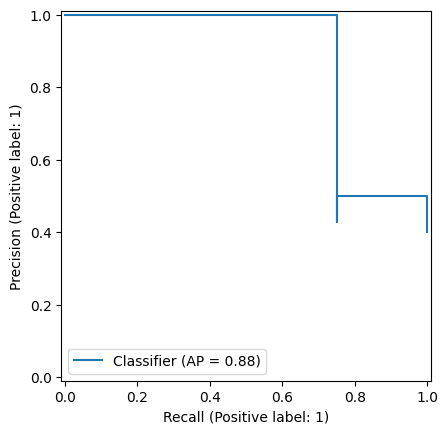

In [13]:
PrecisionRecallDisplay.from_predictions(y, y_hat1)

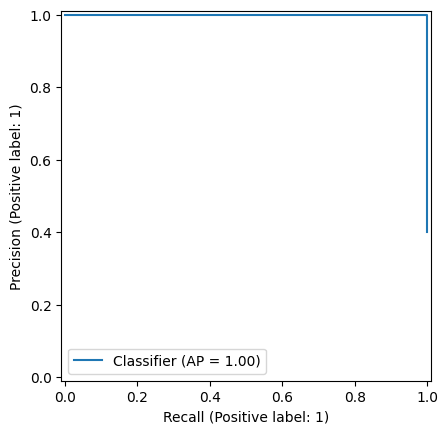

In [14]:
PrecisionRecallDisplay.from_predictions(y, y_hat2)

## Multiclass classification
In multiclass classification, we can use the same idea as in binary classification. 
For accuracy, we can count the number of correct predictions and divide by the total number of predictions.
For AUC, we can use the one-vs-all approach.

In [16]:
d = loadmat("ex_metrics_class_multi.mat")
y = d["y"]
y_hat = d["yhat"]

print(f"y has shape {y.shape}, y_hat has shape {y_hat.shape}.")

print(f"Accuracy: {my_accuracy(np.argmax(y,1), np.argmax(y_hat,1)):.2f}")

y has shape (10, 5), y_hat has shape (10, 5).
Accuracy: 0.60


Note that we obtain a value for each class, which can be averaged.

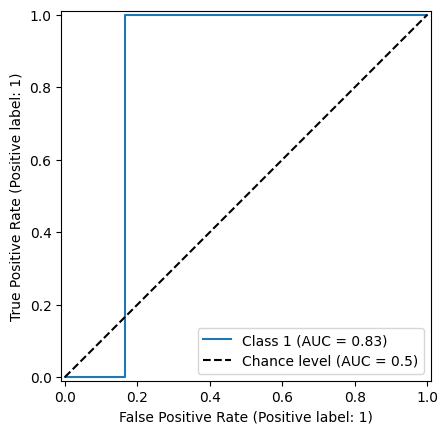

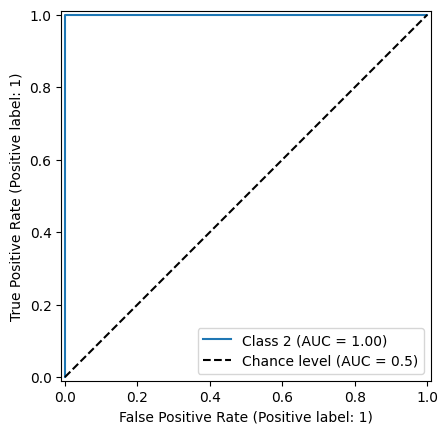

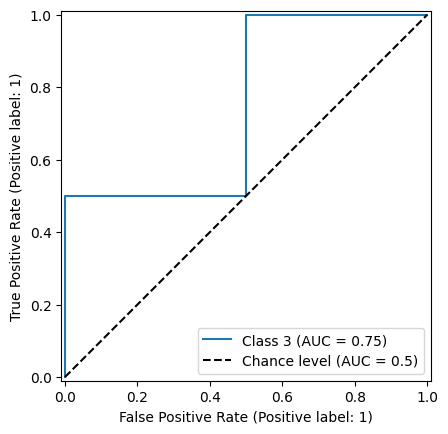

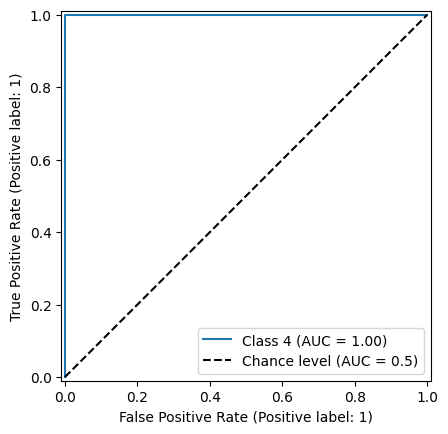

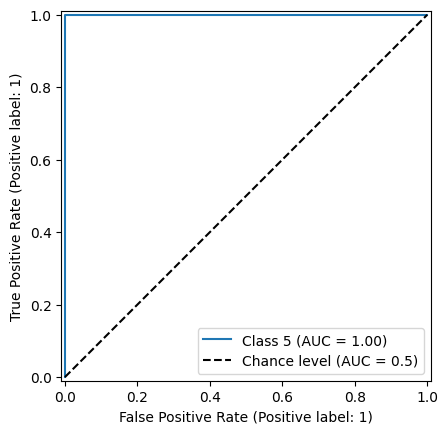

In [17]:
for i in range(y.shape[1]):
    display = RocCurveDisplay.from_predictions(
    y[:, i],
    y_hat[:, i],
    plot_chance_level=True,
    name=f"Class {i+1}"
)


There are several ways to average the AUC values:
- micro: calculate the AUC for each class and average them
- macro: calculate the AUC for each class and average them
- weighted: calculate the AUC for each class and average them, weighting by the number of instances in each class

In [18]:
roc_auc_score(y, y_hat, multi_class="ovr", average="macro")

np.float64(0.9166666666666667)

## Regression

In [19]:
d = loadmat("ex_metrics_regr.mat")
y = d["y"].flatten()
y_hat1 = d["yhat"].flatten()
y_hat2 = d["yhat2"].flatten()

Text(0.5, 0, 't')

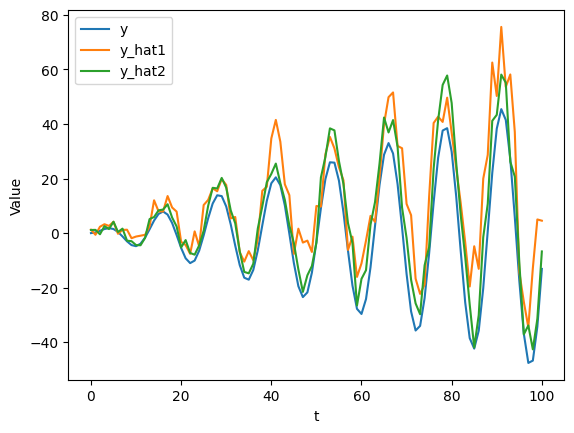

In [20]:
plt.plot(y, label="y")
plt.plot(y_hat1, label="y_hat1")
plt.plot(y_hat2, label="y_hat2")
plt.legend()
plt.ylabel("Value")
plt.xlabel("t")

In [21]:
def mse(y, y_hat):
    return np.mean((y - y_hat) ** 2)
def rmse(y, y_hat):
    return np.sqrt(mse(y, y_hat))
def mae(y, y_hat):
    return np.mean(np.abs(y - y_hat))

print(f"MSE \t1: {mse(y, y_hat1):.2f}, \t2: {mse(y, y_hat2):.2f}")
print(f"RMSE \t1: {rmse(y, y_hat1):.2f}, \t2: {rmse(y, y_hat2):.2f}")
print(f"MAE \t1: {mae(y, y_hat1):.2f}, \t2: {mae(y, y_hat2):.2f}")

MSE 	1: 253.70, 	2: 73.31
RMSE 	1: 15.93, 	2: 8.56
MAE 	1: 12.08, 	2: 6.68


In [22]:
def rss(y, y_hat):
    return np.sum((y - y_hat) ** 2)
def tss(y):
    return np.sum((y - np.mean(y)) ** 2)
def r2(y, y_hat):
    return 1 - rss(y, y_hat) / tss(y)

print(f"R2 \t1: {r2(y, y_hat1):.2f}, \t2: {r2(y, y_hat2):.2f}")

R2 	1: 0.39, 	2: 0.82
